Enter path to your CSV file: /content/card_transdata.csv
Enter the name of your target column: fraud
Data Loaded Successfully: 1000000 rows and 8 columns

Preview of the Data:


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0



Data Types:


,0
distance_from_home,float64
distance_from_last_transaction,float64
ratio_to_median_purchase_price,float64
repeat_retailer,float64
used_chip,float64
used_pin_number,float64
online_order,float64
fraud,float64



Missing Values:


,0
distance_from_home,0
distance_from_last_transaction,0
ratio_to_median_purchase_price,0
repeat_retailer,0
used_chip,0
used_pin_number,0
online_order,0
fraud,0



Performing Exploratory Data Analysis (EDA)...

Summary Statistics:


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


<ipython-input-2-45bd6fa25a37>:103: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


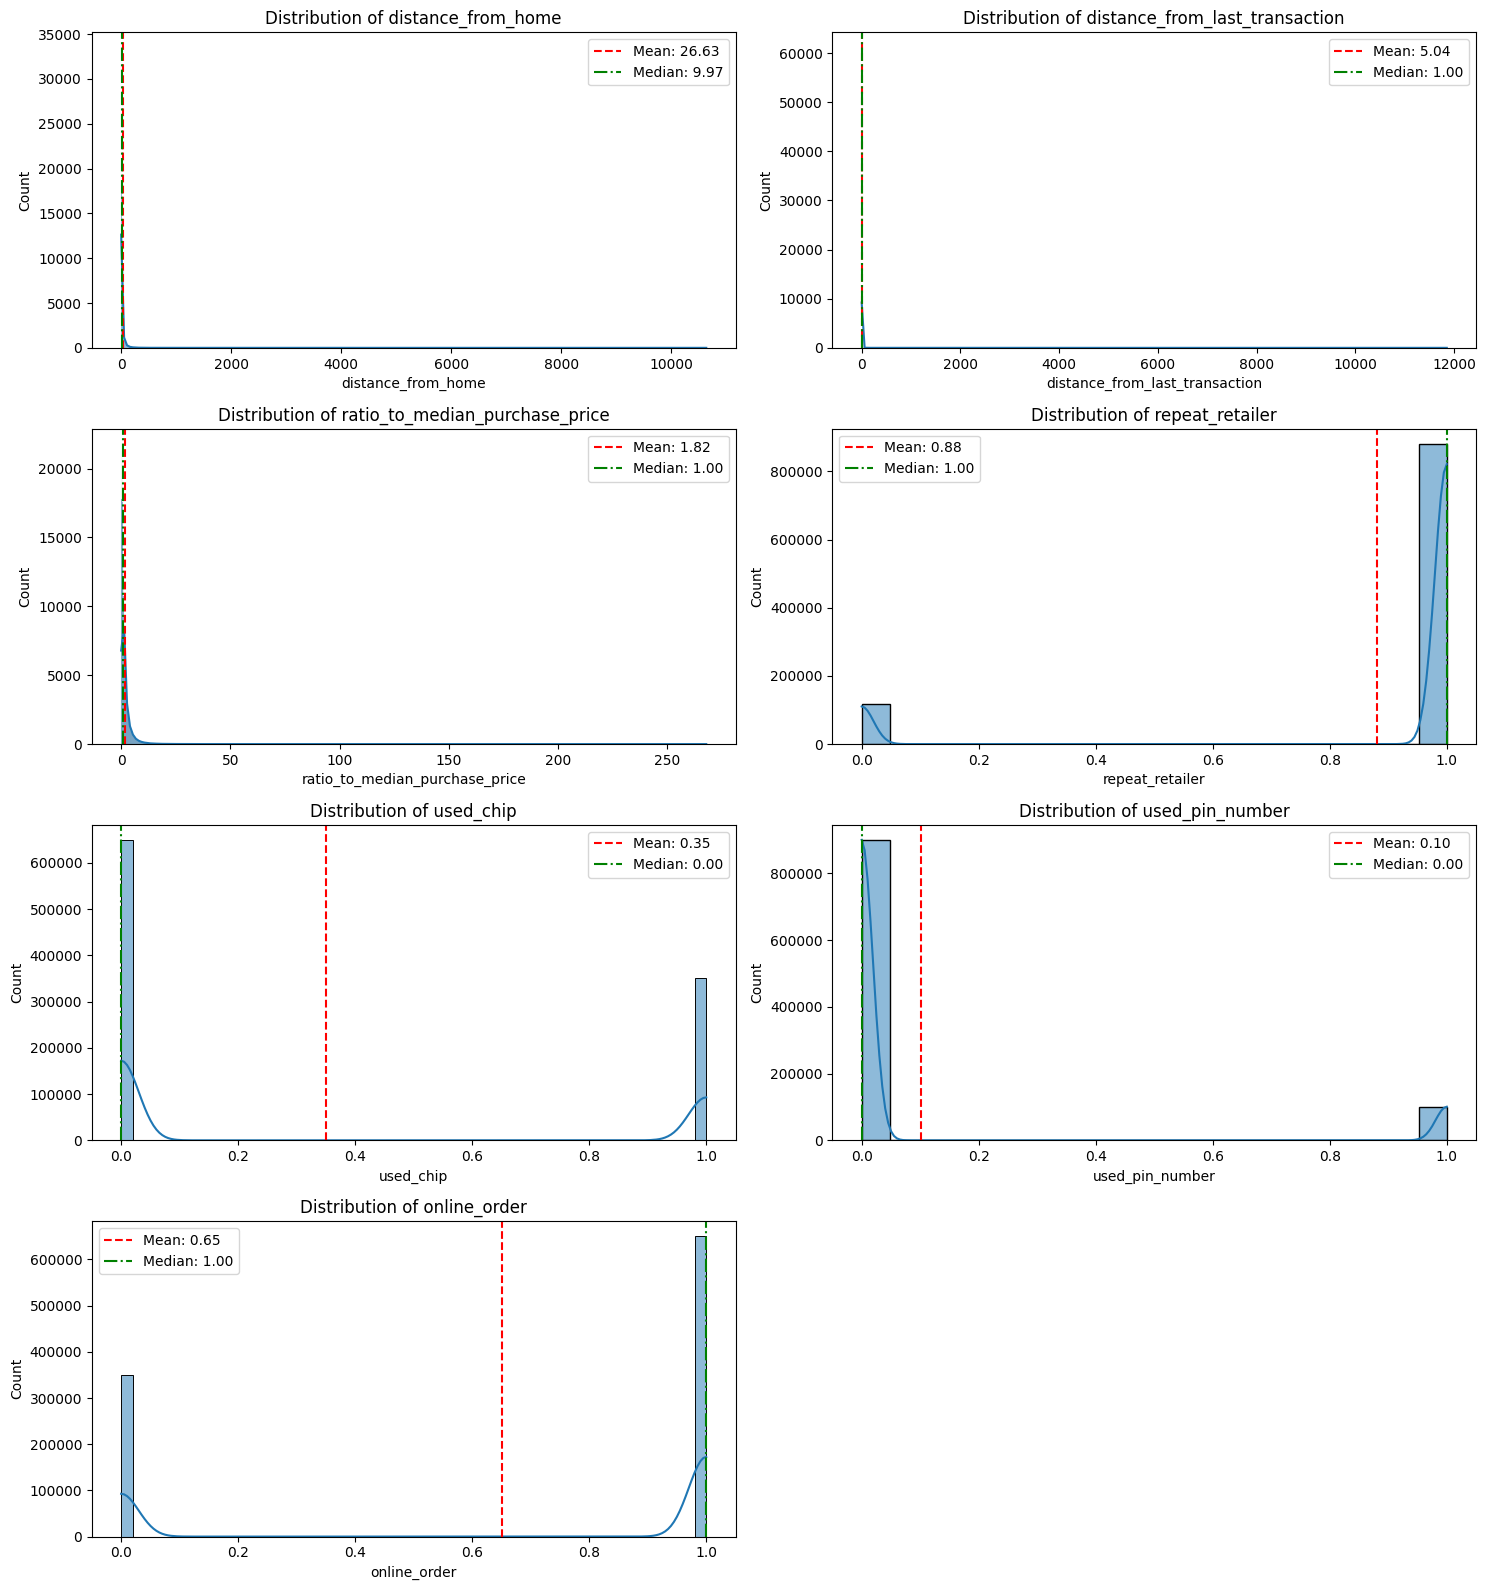

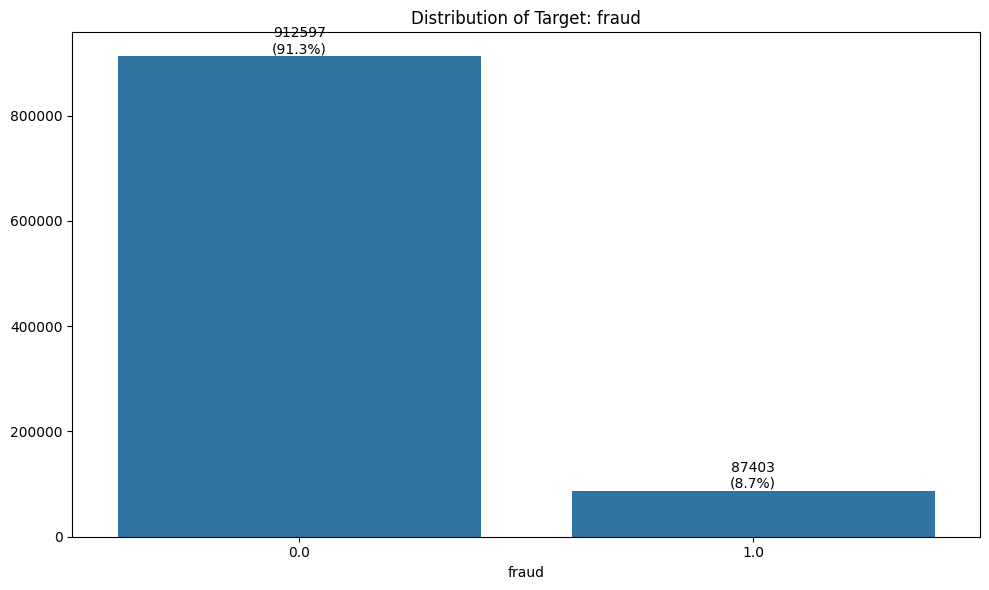

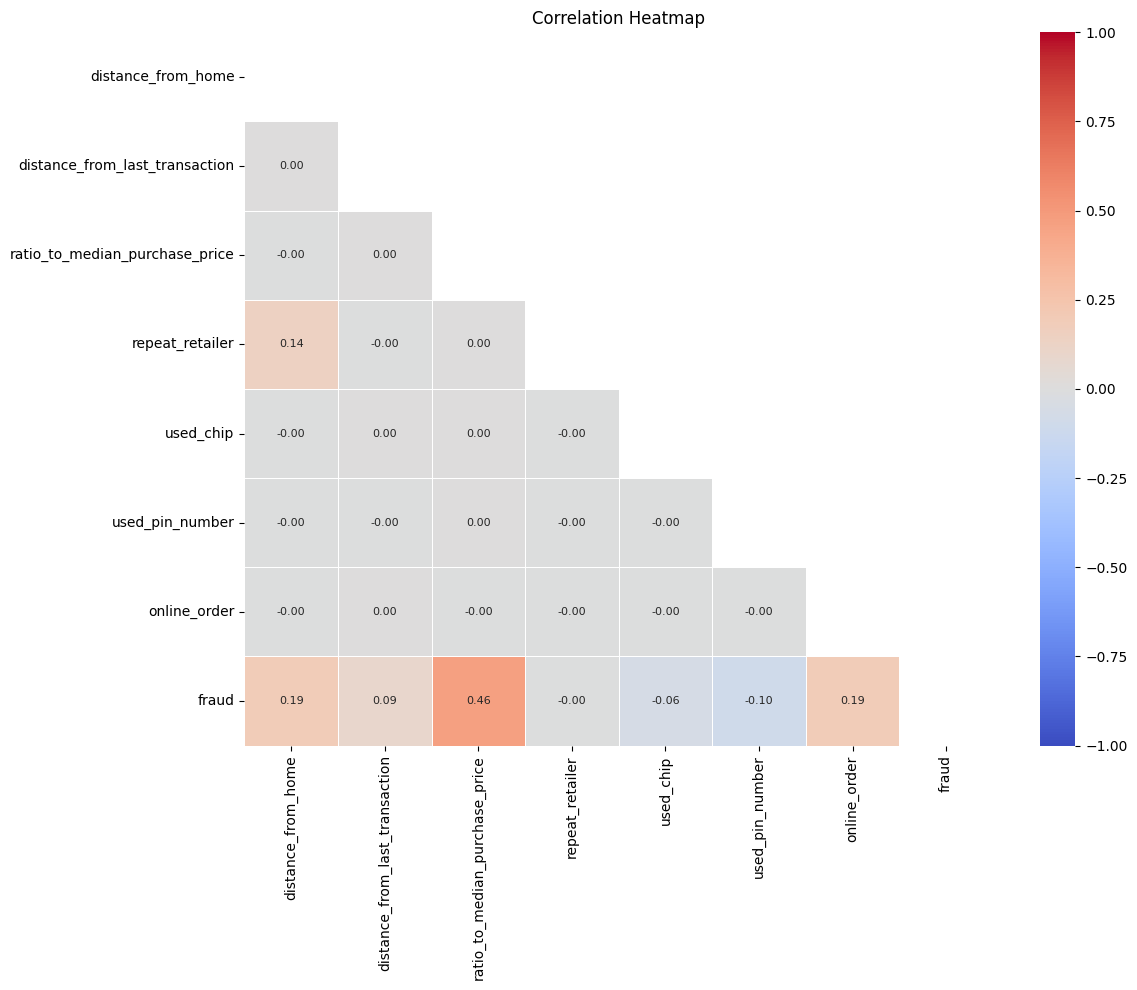

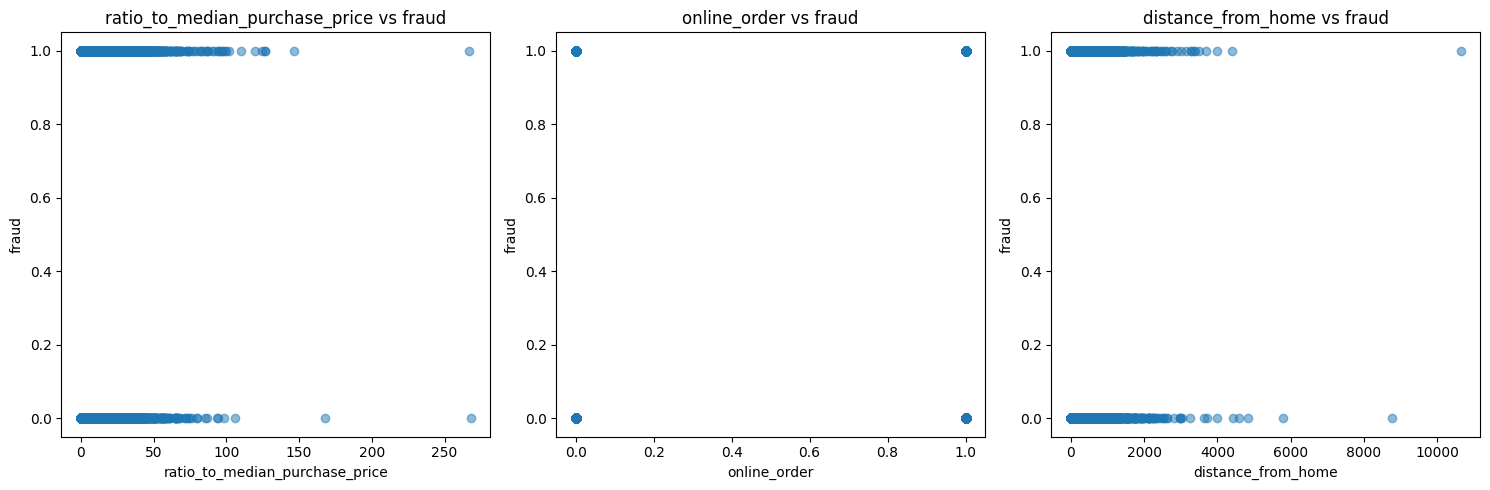


Preprocessing Data...
Data preprocessing completed.

Detected a classification problem with 2 classes.
Training set: 800000 samples
Testing set: 200000 samples

Classification Model Performance:
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182557
         1.0       1.00      1.00      1.00     17443

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



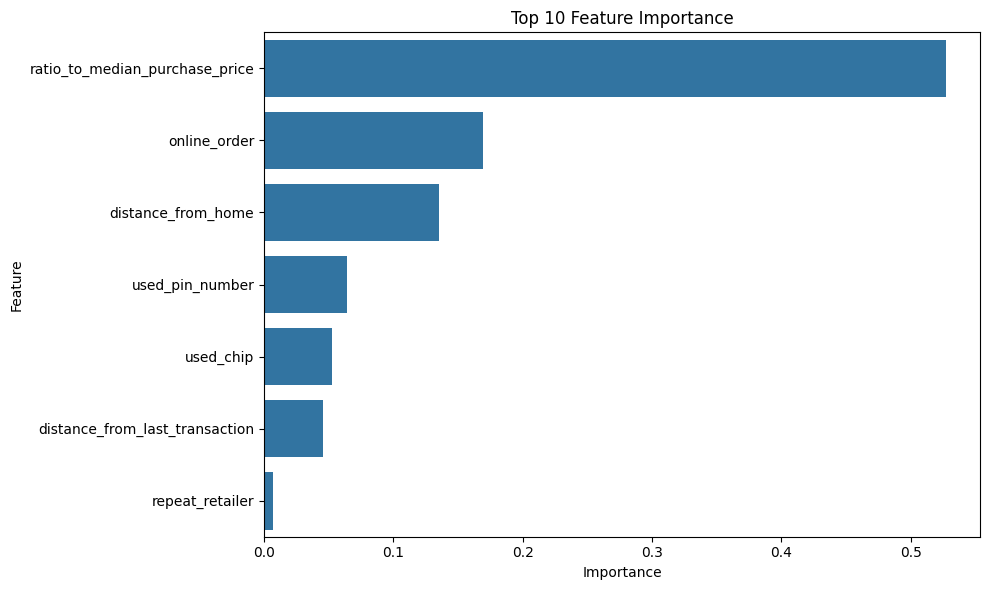


Would you like to make a prediction? (y/n): y

--- Prediction for New Data ---
Enter value for distance_from_home: 45
Enter value for distance_from_last_transaction: 0.5
Enter value for ratio_to_median_purchase_price: 1.2
Enter value for repeat_retailer: 0
Enter value for used_chip: 1
Enter value for used_pin_number: 0
Enter value for online_order: 0

Predicted Class: 1.0

Class Probabilities:
Class 0.0: 0.0400 (4.00%)
Class 1.0: 0.9600 (96.00%)

Would you like to make a prediction? (y/n): n


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

def load_data(file_path):
    """Load and display basic information about the dataset"""
    try:
        df = pd.read_csv(file_path)
        print(f"Data Loaded Successfully: {df.shape[0]} rows and {df.shape[1]} columns")
        print("\nPreview of the Data:")
        display(df.head())

        print("\nData Types:")
        display(df.dtypes)

        print("\nMissing Values:")
        display(df.isnull().sum())

        return df
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

def preprocess_data(df, target_column):
    """Preprocess data with improved handling of features"""
    print("\nPreprocessing Data...")

    df_processed = df.copy()

    # Separate features and target
    X = df_processed.drop(columns=[target_column])
    y = df_processed[target_column]

    # Identify column types
    num_cols = X.select_dtypes(include=['float64', 'int64']).columns
    cat_cols = X.select_dtypes(include=['object', 'category']).columns

    # Handle missing values in numerical columns
    if num_cols.size > 0:
        imputer = SimpleImputer(strategy='mean')
        X[num_cols] = imputer.fit_transform(X[num_cols])

    # Encode categorical variables
    for col in cat_cols:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))

    # Scale numerical features
    scaler = StandardScaler()
    if num_cols.size > 0:
        X[num_cols] = scaler.fit_transform(X[num_cols])

    # Combine processed features with target
    df_processed = pd.concat([X, y], axis=1)

    print("Data preprocessing completed.")
    return df_processed, X, y

def perform_eda(df, target_column):
    """Perform exploratory data analysis with improved visualizations"""
    print("\nPerforming Exploratory Data Analysis (EDA)...")

    # Summary statistics
    print("\nSummary Statistics:")
    display(df.describe())

    # Create a figure for showing distributions of numerical features
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    num_cols = [col for col in num_cols if col != target_column]  # Exclude target

    if len(num_cols) > 0:
        # Plot distributions with better scaling
        n_cols = 2
        n_rows = (len(num_cols) + 1) // 2
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
        axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

        for i, col in enumerate(num_cols):
            if i < len(axes):
                sns.histplot(df[col], kde=True, ax=axes[i])
                axes[i].set_title(f'Distribution of {col}')
                axes[i].set_xlabel(col)

                # Add mean and median lines for reference
                mean_val = df[col].mean()
                median_val = df[col].median()
                axes[i].axvline(mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
                axes[i].axvline(median_val, color='g', linestyle='-.', label=f'Median: {median_val:.2f}')
                axes[i].legend()

        for j in range(i + 1, len(axes)):
            axes[j].set_visible(False)

        plt.tight_layout()
        plt.show()

    # Plot categorical features if any
    cat_cols = df.select_dtypes(include=['object', 'category']).columns

    if len(cat_cols) > 0:
        for col in cat_cols:
            plt.figure(figsize=(10, 6))
            value_counts = df[col].value_counts()

            # If too many categories, limit to top 10
            if len(value_counts) > 10:
                value_counts = value_counts.nlargest(10)
                title_suffix = " (Top 10)"
            else:
                title_suffix = ""

            ax = sns.barplot(x=value_counts.index, y=value_counts.values)
            plt.title(f'Count of {col}{title_suffix}')
            plt.xticks(rotation=45, ha='right')

            # Add count labels on top of bars
            for p in ax.patches:
                ax.annotate(f'{int(p.get_height())}',
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='bottom')

            plt.tight_layout()
            plt.show()

    # Plot target distribution
    plt.figure(figsize=(10, 6))
    if df[target_column].nunique() <= 10:  # For classification
        value_counts = df[target_column].value_counts()
        ax = sns.barplot(x=value_counts.index, y=value_counts.values)
        plt.title(f'Distribution of Target: {target_column}')

        # Add percentage labels
        total = len(df)
        for p in ax.patches:
            percentage = f'{100 * p.get_height() / total:.1f}%'
            ax.annotate(f'{int(p.get_height())}\n({percentage})',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom')
    else:  # For regression
        sns.histplot(df[target_column], kde=True)
        plt.title(f'Distribution of Target: {target_column}')

    plt.tight_layout()
    plt.show()

    # Correlation heatmap with improved readability
    if len(num_cols) > 1:
        plt.figure(figsize=(12, 10))

        # Include target in correlation if numeric
        if pd.api.types.is_numeric_dtype(df[target_column]):
            corr_cols = list(num_cols) + [target_column]
            corr_matrix = df[corr_cols].corr()
        else:
            corr_matrix = df[num_cols].corr()

        # Create mask for upper triangle to avoid redundancy
        mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

        # Generate heatmap with better color mapping and annotations
        sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='coolwarm',
                    linewidths=0.5, vmin=-1, vmax=1, fmt='.2f',
                    annot_kws={"size": 8})
        plt.title("Correlation Heatmap")
        plt.tight_layout()
        plt.show()

    # Feature relationship with target (for top correlated features)
    if pd.api.types.is_numeric_dtype(df[target_column]) and len(num_cols) > 0:
        # Find top 3 correlated features with target
        correlations = df[[target_column] + list(num_cols)].corr()[target_column].abs().sort_values(ascending=False)
        top_features = correlations[1:4].index.tolist()  # Exclude target itself

        if top_features:
            plt.figure(figsize=(15, 5))
            for i, feature in enumerate(top_features, 1):
                plt.subplot(1, len(top_features), i)
                plt.scatter(df[feature], df[target_column], alpha=0.5)
                plt.title(f'{feature} vs {target_column}')
                plt.xlabel(feature)
                plt.ylabel(target_column)
            plt.tight_layout()
            plt.show()

def train_model(X, y):
    """Train model based on problem type with more metrics"""
    # Determine problem type (classification or regression)
    if pd.api.types.is_numeric_dtype(y) and y.nunique() > 5:
        problem_type = 'regression'
        print("\nDetected a regression problem.")
    else:
        problem_type = 'classification'
        print(f"\nDetected a classification problem with {y.nunique()} classes.")

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"Training set: {X_train.shape[0]} samples")
    print(f"Testing set: {X_test.shape[0]} samples")

    # Train model based on problem type
    if problem_type == 'classification':
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Evaluate
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        print("\nClassification Model Performance:")
        print(f"Accuracy: {accuracy:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

        # Feature importance visualization
        feature_importance = pd.DataFrame({
            'Feature': X.columns,
            'Importance': model.feature_importances_
        }).sort_values('Importance', ascending=False)

        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
        plt.title('Top 10 Feature Importance')
        plt.tight_layout()
        plt.show()

    else:  # Regression
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Evaluate
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print("\nRegression Model Performance:")
        print(f"Mean Squared Error: {mse:.4f}")
        print(f"R-Squared: {r2:.4f}")
        print(f"Root Mean Squared Error: {np.sqrt(mse):.4f}")

        # Feature importance visualization
        feature_importance = pd.DataFrame({
            'Feature': X.columns,
            'Importance': model.feature_importances_
        }).sort_values('Importance', ascending=False)

        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
        plt.title('Top 10 Feature Importance')
        plt.tight_layout()
        plt.show()

        # Plot predicted vs actual values
        plt.figure(figsize=(10, 6))
        plt.scatter(y_test, y_pred, alpha=0.5)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title('Actual vs Predicted Values')
        plt.tight_layout()
        plt.show()

    return model, problem_type

def user_input_prediction(model, X, problem_type):
    """Get user input for new predictions with improved interface"""
    print("\n--- Prediction for New Data ---")
    input_data = {}

    for col in X.columns:
        try:
            value = float(input(f"Enter value for {col}: "))
            input_data[col] = [value]
        except ValueError:
            print(f"Error: Please enter a numeric value for {col}.")
            return

    # Convert to DataFrame
    input_df = pd.DataFrame(input_data)

    # Make prediction
    prediction = model.predict(input_df)[0]

    if problem_type == 'classification':
        print(f"\nPredicted Class: {prediction}")

        # Show probabilities for classification
        proba = model.predict_proba(input_df)[0]
        classes = model.classes_

        print("\nClass Probabilities:")
        for cls, prob in zip(classes, proba):
            print(f"Class {cls}: {prob:.4f} ({prob*100:.2f}%)")
    else:
        print(f"\nPredicted Value: {prediction:.4f}")

def run_pipeline(file_path, target_column):
    """Run the complete machine learning pipeline"""
    # Load data
    df = load_data(file_path)
    if df is None:
        print("Pipeline aborted due to data loading error.")
        return

    # Perform EDA
    perform_eda(df, target_column)

    # Preprocess data
    df_processed, X, y = preprocess_data(df, target_column)

    # Train model
    model, problem_type = train_model(X, y)

    # Get user input for prediction
    while True:
        user_input = input("\nWould you like to make a prediction? (y/n): ").lower()
        if user_input != 'y':
            break
        user_input_prediction(model, X, problem_type)

if __name__ == "__main__":
    file_path = input("Enter path to your CSV file: ")
    target_column = input("Enter the name of your target column: ")
    run_pipeline(file_path, target_column)